# AI-CA5-P2 
## Convolutional Neural Networks (CNNs)

### **Majid Faridfar** (Student Number: 810199569)

### Part $0$ - Data Preparation

In this project, we plan to use `CIFAR-10` dataset, which is a set of images that is commonly used to train machine learning and machine vision algorithms. This dataset is one of the most widely used datasets for machine learning research.

First, we load the aforementioned dataset from `datasets.keras.tensorflow` into `x_train`and `y_train`, which forms the *train data* and `x_test` and `y_test`, which is used as the *test data*. 

In [1]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

The `CIFAR-10` dataset contains $60,000$ $32$x$32$ color images in $10$ different classes. It shows $10$ different classes of `airplanes`, `cars`, `birds`, `cats`, `deer`, `dogs`, `frogs`, `horses`, `ships` and `trucks`. There are $6000$ images of each class.

Now we define a list that contains the names of the classes of this data set.

In [2]:
num_of_classes = 10

labels = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}

Next, you can see a random image from each class in the dataset. The images shown are labeled

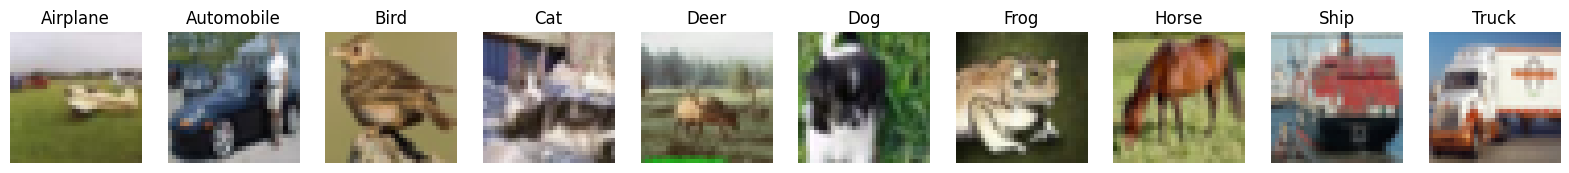

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, num_of_classes, figsize=(20,20))

for i, label in enumerate(labels.keys()):
    idxs = np.where(y_train == label)[0]
    idx = np.random.choice(idxs)
    img = x_train[idx]

    axs[i].imshow(img)
    axs[i].set_title(labels[label])
    axs[i].axis("off")

plt.show()

Here, we get the number of images of each class in the train and test data.

In [4]:
train_counts = np.array([len(np.where(y_train == i)[0]) for i in range(num_of_classes)])
test_counts = np.array([len(np.where(y_test == i)[0]) for i in range(num_of_classes)])

print("Train Data:")
print(train_counts)

print("Test Data:")
print(test_counts)

Train Data:
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
Test Data:
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


As you can see, the data set is divided into training and test sections at a ratio of five to one. (that is, $50,000$ data for training and $10,000$ for testing). Also, this division is done in a balanced way. That is, the number of images of each class in the training and test data is equal (for the training data, we have $5000$ of each class and in the test data, we have $1000$ of each class).

Also, here you can see the Bar graph of the calculations.

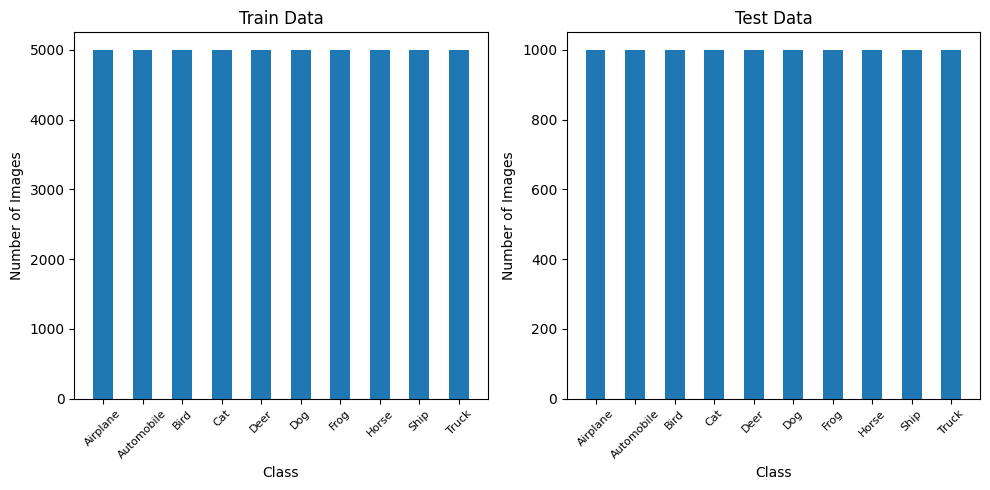

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(labels.values(), train_counts, width=0.5, align='center')
axs[0].set_title("Train Data")
axs[0].set_xlabel("Class")
axs[0].set_ylabel("Number of Images")
axs[0].tick_params(axis='x', rotation=45, labelsize=8)

axs[1].bar(labels.values(), test_counts, width=0.5, align='center')
axs[1].set_title("Test Data")
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Number of Images")
axs[1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

#### Normalize the data
It's done, by dividing every cell of all images, by $255$. which is the maximum amount of all cells.

In [6]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

#### OneHot Encoding

to do it, i use `to_categorical` function which is available in `tensorflow.keras.utils`.

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_of_classes)
y_test_onehot = to_categorical(y_test, num_of_classes)

### Part $1$ - Classification of Images using a **CNN Network**

At first, I will define some functions to evaluate the model.
* `plot_loss_and_accuracy`: This functions plots the values of `loss` and `accuracy` is calculated during the traning process. Bot for train data and test data.
* `evaluate_model`: This function, gets the predictions of model for normalized train and test data with onhot encoded labels.
* `report_metrics`: This functions is defined for printing the `classification_report` for train and test data, by comparing the predictions and true labels.
* `report_and_plot`: plots `loss` and `accuracy`, and prints the `classification_report`.

In [8]:
def plot_loss_and_accuracy(log):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(log.history['loss'], label='Training Loss')
    plt.plot(log.history['val_loss'], label='Validation Loss')
    plt.title('Loss Plot')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(log.history['accuracy'], label='Training Accuracy')
    plt.plot(log.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Plot')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [27]:
import numpy as np

def evaluate_model(model):
    y_train_pred = model.predict(x_train_normalized)
    y_train_pred_labels = np.argmax(y_train_pred, axis=1)

    y_test_pred = model.predict(x_test_normalized)
    y_test_pred_labels = np.argmax(y_test_pred, axis=1)

    return y_train_pred_labels, y_test_pred_labels

In [29]:
from sklearn.metrics import classification_report

def report_metrics(y_train_pred_labels, y_test_pred_labels):
    y_train_true_labels = np.argmax(y_train_onehot, axis=1)
    y_test_true_labels = np.argmax(y_test_onehot, axis=1)

    train_report = classification_report(y_train_true_labels, y_train_pred_labels)
    print('Train report:')
    print(train_report)

    test_report = classification_report(y_test_true_labels, y_test_pred_labels)
    print('Test report:')
    print(test_report)

In [30]:
def evaluate_and_report(model):
    y_train_pred_labels, y_test_pred_labels = evaluate_model(model)
    report_metrics(y_train_pred_labels, y_test_pred_labels)

def report_and_plot(log, model):
    evaluate_and_report(model)
    plot_loss_and_accuracy(log)

Here, I define the topology of a **CNN Neural Network** using the tools of `keras`, and I use **Adam Optimizer**.

Note: I found this topology on the Internet as one of the good topologies, which works fine on `CIFAR-10` dataset.

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Input, Flatten
from keras.optimizers import Adam

cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(units=128)) 
cnn.add(Activation('relu'))
cnn.add(Dense(units=10))
cnn.add(Activation('softmax'))

cnn.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

Now, I train the model I compiled above, on `x_train_normalized`, and use `x_test_normalized` as the validation data. The labels are OneHot encoded here, both for train and test data. I repeat training for $40$ epochs.

In [26]:
log = cnn.fit(x=x_train_normalized, 
              y=y_train_onehot, 
              batch_size=32, 
              epochs=40,
              validation_data=(x_test_normalized, y_test_onehot))

Epoch 1/40
1563/1563 [==============================] - 17s 9ms/step - loss: 1.4952 - accuracy: 0.4518 - val_loss: 1.2762 - val_accuracy: 0.5559
Epoch 2/40
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9811 - accuracy: 0.6530 - val_loss: 0.9254 - val_accuracy: 0.6792
Epoch 3/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7790 - accuracy: 0.7276 - val_loss: 0.8278 - val_accuracy: 0.7201
Epoch 4/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6549 - accuracy: 0.7711 - val_loss: 0.7284 - val_accuracy: 0.7511
Epoch 5/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5589 - accuracy: 0.8030 - val_loss: 0.7068 - val_accuracy: 0.7597
Epoch 6/40
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4801 - accuracy: 0.8314 - val_loss: 0.7348 - val_accuracy: 0.7623
Epoch 7/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4079 - accuracy: 0.8556 - val_loss: 0.7722 - val_a

And, here you can see the plot of `loss` and `accuracy`, and also `classification_report` for evaluation of model on predictions for train and test data.

313/313 [==============================] - 1s 2ms/step
Train report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5000
           1       0.99      0.98      0.99      5000
           2       0.98      0.93      0.95      5000
           3       0.92      0.96      0.94      5000
           4       0.93      0.98      0.96      5000
           5       0.97      0.94      0.96      5000
           6       0.97      0.96      0.97      5000
           7       0.95      0.99      0.97      5000
           8       0.98      0.99      0.98      5000
           9       0.98      0.98      0.98      5000

    accuracy                           0.97     50000
   macro avg       0.97      0.97      0.97     50000
weighted avg       0.97      0.97      0.97     50000

Test report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1000
           1       0.89      0.85      0.87      1

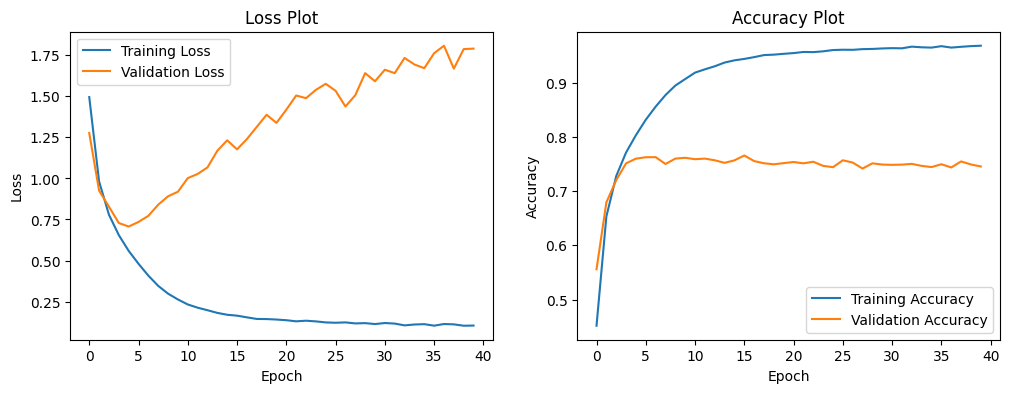

In [31]:
report_and_plot(log, cnn)

As you can see, the accuracy is $75$%, which is good.

#### How Adam Optimizer works?
The Adam optimizer is an adaptive learning rate optimization algorithm that is well-suited for large datasets and high-dimensional parameter spaces.

The Adam optimizer computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients. The first moment is the mean of the gradients, and the second moment is the uncentered variance of the gradients. The algorithm then updates the parameters by combining the first and second moments of the gradients with a learning rate.

#### What are the differences between Adam optimizer and SGD optimizer, which was used in the previous phase of this project?
The Adam optimizer has several advantages over the Stochastic Gradient Descent (SGD) optimizer. First, it is computationally efficient and requires little memory, making it well-suited for large datasets. Second, it is well-suited for non-stationary objectives and noisy gradients, which can cause problems for SGD. Third, it is less sensitive to the choice of hyperparameters, such as the learning rate, than SGD.

However, there are also some cases where SGD may perform better than Adam. For example, SGD may be better suited for problems with sparse gradients or when the objective function is non-convex. Additionally, SGD may be more effective when the learning rate is carefully tuned.

### Part $2$ - Network training with Unbalanced Data

To generate an unbalanced dataset for training the previous model on it, I load `CIFAR-10` again.

In [16]:
from tensorflow.keras.datasets import cifar10
(x_train_unbalanced, y_train_unbalanced), (x_test_unbalanced, y_test_unbalanced) = cifar10.load_data()

Here, I randomly choose $80$% of data which have label Airplaine ($0$), or Automobile ($1$), and remove them form the dataset. In this way, we get an unbalanced data set, which can be used in the part of project.

In [17]:
import numpy as np

class_indices = [0, 1]  # Airplane and automobile classes
x_train_selected = []
y_train_selected = []

for class_index in class_indices:
    # Select the indices of samples belonging to the current class
    indices = np.where(y_train_unbalanced == class_index)[0]

    # Shuffle the indices
    np.random.shuffle(indices)

    # Remove 80% of the indices
    num_to_remove = int(0.8 * len(indices))
    indices_to_remove = indices[:num_to_remove]

    # Remove the corresponding samples and labels
    x_train_unbalanced = np.delete(x_train_unbalanced, indices_to_remove, axis=0)
    y_train_unbalanced = np.delete(y_train_unbalanced, indices_to_remove, axis=0)

    # Append the remaining samples and labels to x_train_selected and y_train_selected
    x_train_selected.append(x_train_unbalanced[y_train_unbalanced[:, 0] == class_index])
    y_train_selected.append(y_train_unbalanced[y_train_unbalanced[:, 0] == class_index])

In [18]:
train_counts_unbalanced = np.array([len(np.where(y_train_unbalanced == i)[0]) for i in range(num_of_classes)])
test_counts_unbalanced = np.array([len(np.where(y_test_unbalanced == i)[0]) for i in range(num_of_classes)])

print("Train Data:")
print(train_counts_unbalanced)

print("Test Data:")
print(test_counts_unbalanced)

Train Data:
[1000 1000 5000 5000 5000 5000 5000 5000 5000 5000]
Test Data:
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


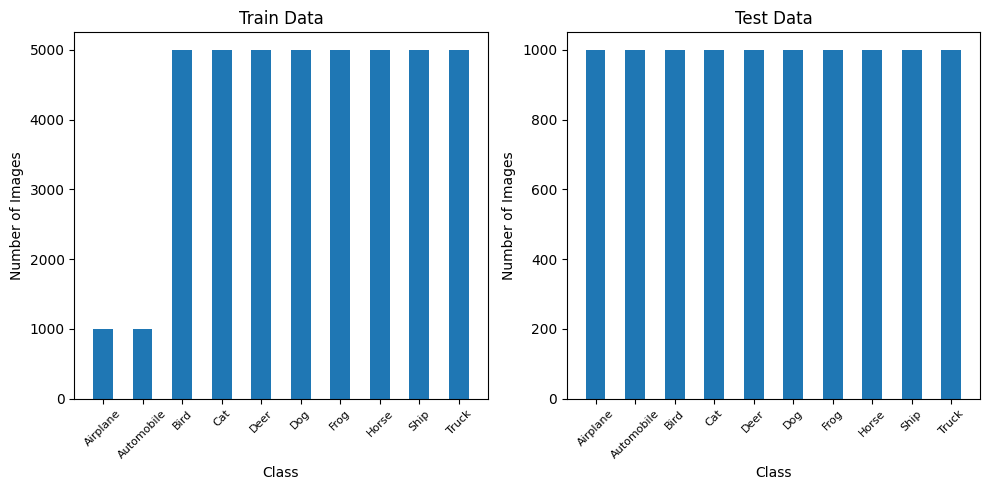

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(labels.values(), train_counts_unbalanced, width=0.5, align='center')
axs[0].set_title("Train Data")
axs[0].set_xlabel("Class")
axs[0].set_ylabel("Number of Images")
axs[0].tick_params(axis='x', rotation=45, labelsize=8)

axs[1].bar(labels.values(), test_counts_unbalanced, width=0.5, align='center')
axs[1].set_title("Test Data")
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Number of Images")
axs[1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

Here you can see, for `unbalanced` data, there are only $1000$ entries for labels Airplane and Automobile, but $5000$ entries for rest of the labels, among the train data.

But the test data hasn't any change.

In the following I normalize the train data and encode the labels to OneHot.

In [20]:
x_train_unbalanced_normalized = x_train_unbalanced / 255.0

In [21]:
y_train_unbalanced_onehot = to_categorical(y_train_unbalanced, num_of_classes)

Here I redefine the previous topolgy of the CNN Network, to use it again without any training before.

In [22]:
cnn2 = Sequential()

cnn2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn2.add(Activation('relu'))
cnn2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))

cnn2.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn2.add(Activation('relu'))
cnn2.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))

cnn2.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn2.add(Activation('relu'))
cnn2.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))

cnn2.add(Flatten())
cnn2.add(Dense(units=128)) 
cnn2.add(Activation('relu'))
cnn2.add(Dense(units=10))
cnn2.add(Activation('softmax'))

cnn2.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

I train it on `x_train_unbalanced_normalized`.

In [24]:
log2 = cnn2.fit(x=x_train_unbalanced_normalized, 
                y=y_train_unbalanced_onehot, 
                batch_size=32, 
                epochs=40,
                validation_data=(x_test_normalized, y_test_onehot))

Epoch 1/40
1313/1313 [==============================] - 9s 7ms/step - loss: 1.4932 - accuracy: 0.4540 - val_loss: 1.3111 - val_accuracy: 0.5207
Epoch 2/40
1313/1313 [==============================] - 9s 7ms/step - loss: 0.9944 - accuracy: 0.6476 - val_loss: 0.9988 - val_accuracy: 0.6509
Epoch 3/40
1313/1313 [==============================] - 9s 7ms/step - loss: 0.7982 - accuracy: 0.7170 - val_loss: 0.8769 - val_accuracy: 0.7002
Epoch 4/40
1313/1313 [==============================] - 9s 6ms/step - loss: 0.6632 - accuracy: 0.7670 - val_loss: 0.9393 - val_accuracy: 0.6920
Epoch 5/40
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5591 - accuracy: 0.8037 - val_loss: 0.8194 - val_accuracy: 0.7347
Epoch 6/40
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4736 - accuracy: 0.8325 - val_loss: 0.8277 - val_accuracy: 0.7297
Epoch 7/40
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4013 - accuracy: 0.8591 - val_loss: 0.9524 - val_accuracy:

And here you can see the metrics and plot of accuracy and loss.

313/313 [==============================] - 1s 2ms/step
Train report:
              precision    recall  f1-score   support

           0       0.99      0.56      0.71      5000
           1       0.98      0.76      0.85      5000
           2       0.86      0.98      0.92      5000
           3       0.89      0.98      0.93      5000
           4       0.93      0.98      0.95      5000
           5       0.99      0.92      0.95      5000
           6       0.95      0.99      0.97      5000
           7       0.97      0.97      0.97      5000
           8       0.84      0.99      0.91      5000
           9       0.82      0.99      0.90      5000

    accuracy                           0.91     50000
   macro avg       0.92      0.91      0.91     50000
weighted avg       0.92      0.91      0.91     50000

Test report:
              precision    recall  f1-score   support

           0       0.91      0.47      0.62      1000
           1       0.92      0.71      0.80      1

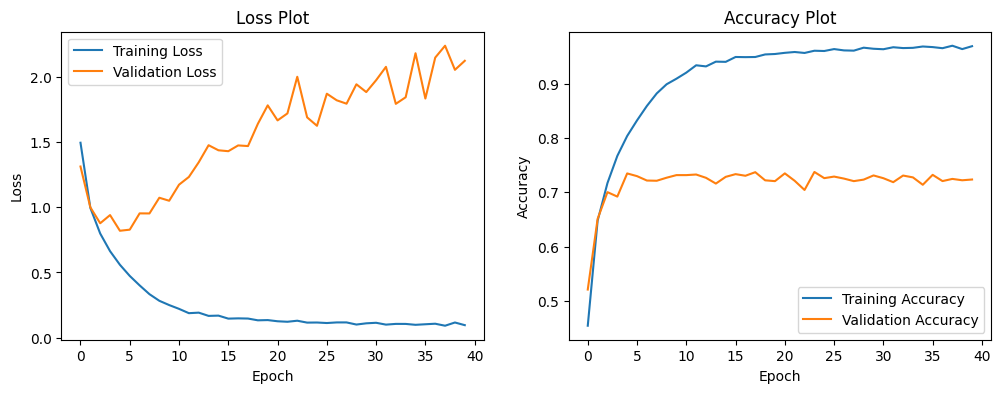

In [35]:
report_and_plot(log2, cnn2)

#### Analysis of the Results
**Recall**

For `airplane`, amount of `recall`, which model was trained using a balanced dataset, was $73$%, but here, for a model which is trained on an unbalanced dataset, is $47$%, which is much less. Aslo for `automobile`, recall is decreased from $85$% to $71$%. 

**F1-Score**

For `airplane`, amount of `f1-score`, which model was trained using a balanced dataset, was $77$%, but here, for a model which is trained on an unbalanced dataset, is $62$%, which is much less. Aslo for `automobile`, f1-score is decreased from $87$% to $80$%.

**Why?**

Reason of these events, is CNN network, in this part, is trained on a dataset that has a significantly lower number of samples for classes `airplane` and `automobile`. This means that the network is not exposed to enough examples of these classes during training, which lead to a decrease in its ability to correctly classify these classes.

In an unbalanced dataset, the network may become biased towards the majority class, which in this case is likely to be the class with more samples, and may not learn to distinguish the minority class as well.



### Part $3$ - Using **Data Augmentation** to Balance the Number of Data

Here, I use `ImageDataGenerator` to augmentation the data, and generate some new data for the classes selected in the previous part (Airplane and Automobile).

You can see the parameters I use for the construction of datagen, which determines how the data will be generated.

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use data augmentation to increase the size of the selected classes
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

x_augmented = []
y_augmented = []
for i in range(len(x_train_selected)):
    # Generate augmented images for the current class
    generator = datagen.flow(x_train_selected[i], y_train_selected[i], batch_size=5000)
    x_batch, y_batch = generator.next()
    x_augmented.append(x_batch)
    y_augmented.append(y_batch)

# Concatenate the augmented images with the original dataset
x_train_balanced = np.concatenate([x_train_unbalanced] + x_augmented, axis=0)
y_train_balanced = np.concatenate([y_train_unbalanced] + y_augmented, axis=0)

In [28]:
train_counts_balanced = np.array([len(np.where(y_train_balanced == i)[0]) for i in range(num_of_classes)])
test_counts_balanced = np.array([len(np.where(y_train_balanced == i)[0]) for i in range(num_of_classes)])

print("Train Data:")
print(train_counts_balanced)

print("Test Data:")
print(test_counts_balanced)

Train Data:
[2000 2000 5000 5000 5000 5000 5000 5000 5000 5000]
Test Data:
[2000 2000 5000 5000 5000 5000 5000 5000 5000 5000]


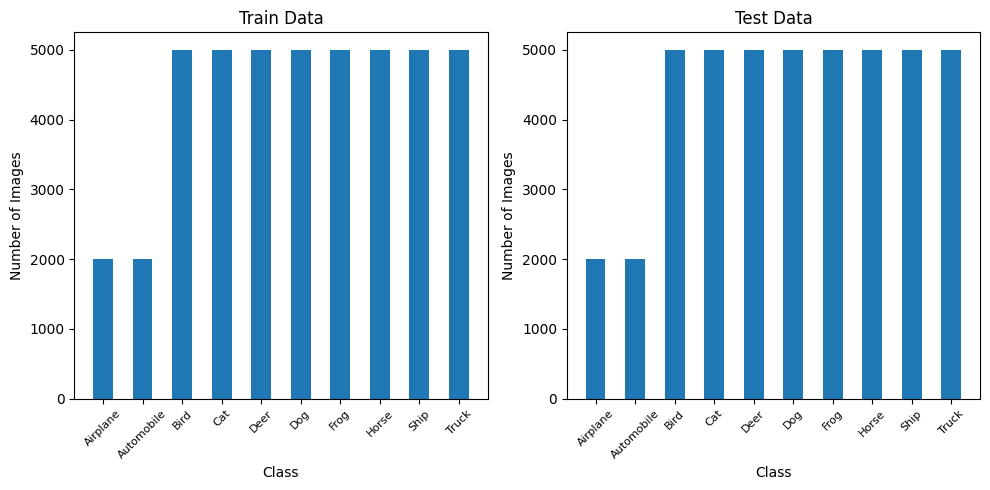

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(labels.values(), train_counts_balanced, width=0.5, align='center')
axs[0].set_title("Train Data")
axs[0].set_xlabel("Class")
axs[0].set_ylabel("Number of Images")
axs[0].tick_params(axis='x', rotation=45, labelsize=8)

axs[1].bar(labels.values(), test_counts_balanced, width=0.5, align='center')
axs[1].set_title("Test Data")
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Number of Images")
axs[1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

As you can see, $1000$ more data is added using augmentation to classes Airplane and Automobile, which helps model, performs better.

Next I normalize the data and encode the labels using `to_categorical` function.

In [30]:
x_train_balanced_normalized = x_train_balanced / 255.0

In [31]:
y_train_balanced_onehot = to_categorical(y_train_balanced, num_of_classes)

Here the topoly used in parts $1$ and $2$, is written again.

In [32]:
cnn3 = Sequential()

cnn3.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn3.add(Activation('relu'))
cnn3.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))

cnn3.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn3.add(Activation('relu'))
cnn3.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))

cnn3.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn3.add(Activation('relu'))
cnn3.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))

cnn3.add(Flatten())
cnn3.add(Dense(units=128)) 
cnn3.add(Activation('relu'))
cnn3.add(Dense(units=10))
cnn3.add(Activation('softmax'))

cnn3.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

And I train it on `x_train_balanced_normalized`, which, as you saw, is balanced compare to the dataset used in the previous part of project, using augmentation.

In [34]:
log3 = cnn3.fit(x=x_train_balanced_normalized, 
                y=y_train_balanced_onehot, 
                batch_size=32, 
                epochs=40,
                validation_data=(x_test_normalized, y_test_onehot))

Epoch 1/40
1375/1375 [==============================] - 10s 7ms/step - loss: 1.5418 - accuracy: 0.4368 - val_loss: 1.2883 - val_accuracy: 0.5357
Epoch 2/40
1375/1375 [==============================] - 8s 6ms/step - loss: 1.0296 - accuracy: 0.6330 - val_loss: 0.9519 - val_accuracy: 0.6705
Epoch 3/40
1375/1375 [==============================] - 8s 6ms/step - loss: 0.8114 - accuracy: 0.7149 - val_loss: 0.8807 - val_accuracy: 0.7029
Epoch 4/40
1375/1375 [==============================] - 9s 7ms/step - loss: 0.6792 - accuracy: 0.7623 - val_loss: 0.8096 - val_accuracy: 0.7213
Epoch 5/40
1375/1375 [==============================] - 9s 6ms/step - loss: 0.5788 - accuracy: 0.7980 - val_loss: 0.8322 - val_accuracy: 0.7169
Epoch 6/40
1375/1375 [==============================] - 8s 6ms/step - loss: 0.4891 - accuracy: 0.8275 - val_loss: 0.7843 - val_accuracy: 0.7425
Epoch 7/40
1375/1375 [==============================] - 8s 6ms/step - loss: 0.4158 - accuracy: 0.8540 - val_loss: 0.7757 - val_accuracy

Next, you can see the needed metrics for train and test, and also the plots of Loss and Accuracy.

313/313 [==============================] - 1s 3ms/step
Train report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      5000
           1       0.97      0.83      0.89      5000
           2       0.93      0.96      0.95      5000
           3       0.96      0.95      0.95      5000
           4       0.95      0.97      0.96      5000
           5       0.95      0.97      0.96      5000
           6       0.98      0.97      0.97      5000
           7       0.92      1.00      0.96      5000
           8       0.86      1.00      0.93      5000
           9       0.88      0.98      0.93      5000

    accuracy                           0.93     50000
   macro avg       0.94      0.93      0.93     50000
weighted avg       0.94      0.93      0.93     50000

Test report:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      1000
           1       0.88      0.79      0.83      1

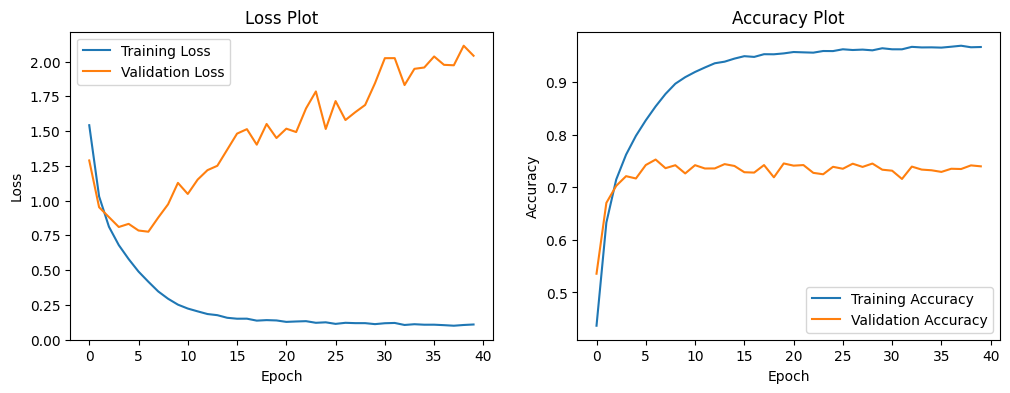

In [36]:
report_and_plot(log3, cnn3)

#### Analysis of the Results
**Recall**

For `airplane`, amount of `recall`, which model was trained using an unbalanced dataset, was $47$%, but here, for a model which is trained on an more balanced dataset, is $65$%. Aslo for `automobile`, recall is increased from $71$% to $79$%. 

**F1-Score**

For `airplane`, amount of `f1-score`, which model was trained using an unbalanced dataset, was $62$%, but here, for a model which is trained on a more balanced dataset, is $72$%. Aslo for `automobile`, f1-score is increased from $80$% to $83$%.

**Why?**

By adding 1000 more data for both classes and applying data augmentation techniques, we have increased the number of samples available for the airplane and automobile classes. This can help alleviate the majority class bias problem that was present in the previous part and provide the model with a more balanced view of all classes during training. As a result, the model may learn to distinguish between all classes equally and achieve higher recall and F1-score values on the minority classes.


### Part $4$ - The Effect of **Regularization** Methods in the Education Process

I redefine the topoly again, with added `BatchNormalization` layer between `Convolutional` layers, and `Dropout` layer between the `Dense` layers, compare to the model used in previous parts of projects.

Also I put some more `Dropout` layers after each `MaxPooling`.

In [15]:
from keras.layers import BatchNormalization

cnn4 = Sequential()

cnn4.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn4.add(Activation('relu'))
cnn4.add(BatchNormalization())
cnn4.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn4.add(Activation('relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn4.add(Activation('relu'))
cnn4.add(BatchNormalization())
cnn4.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn4.add(Activation('relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn4.add(Activation('relu'))
cnn4.add(BatchNormalization())
cnn4.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
cnn4.add(Activation('relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.2))

cnn4.add(Flatten())
cnn4.add(Dropout(0.25))
cnn4.add(Dense(units=128)) 
cnn4.add(Activation('relu'))
cnn4.add(Dropout(0.25))
cnn4.add(Dense(units=10))
cnn4.add(Activation('softmax'))

cnn4.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

And I train it on `x_train_normalized`, which is not unbalanced ot augmented.

In [16]:
log4 = cnn4.fit(x=x_train_normalized, 
                y=y_train_onehot,
                batch_size=32,
                epochs=40,
                validation_data=(x_test_normalized, y_test_onehot))

Epoch 1/40
1563/1563 [==============================] - 30s 9ms/step - loss: 1.5550 - accuracy: 0.4400 - val_loss: 1.4916 - val_accuracy: 0.4755
Epoch 2/40
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0959 - accuracy: 0.6161 - val_loss: 1.0224 - val_accuracy: 0.6502
Epoch 3/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9274 - accuracy: 0.6801 - val_loss: 0.7977 - val_accuracy: 0.7264
Epoch 4/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8228 - accuracy: 0.7170 - val_loss: 0.8165 - val_accuracy: 0.7189
Epoch 5/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7415 - accuracy: 0.7484 - val_loss: 0.6780 - val_accuracy: 0.7747
Epoch 6/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6854 - accuracy: 0.7665 - val_loss: 0.7333 - val_accuracy: 0.7558
Epoch 7/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6500 - accuracy: 0.7806 - val_loss: 0.6561 - val_ac

The metrics and plots are shown blew.

313/313 [==============================] - 1s 3ms/step
Train report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5000
           1       1.00      0.97      0.99      5000
           2       0.99      0.97      0.98      5000
           3       0.95      0.97      0.96      5000
           4       0.99      0.99      0.99      5000
           5       0.98      0.95      0.97      5000
           6       0.98      1.00      0.99      5000
           7       0.99      0.99      0.99      5000
           8       0.99      1.00      0.99      5000
           9       0.98      1.00      0.99      5000

    accuracy                           0.98     50000
   macro avg       0.98      0.98      0.98     50000
weighted avg       0.98      0.98      0.98     50000

Test report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
           1       0.96      0.90      0.93      1

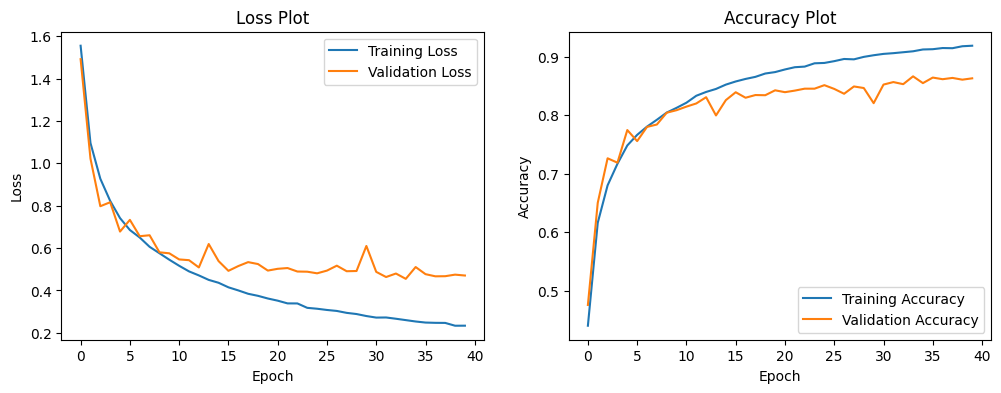

In [17]:
report_and_plot(log4, cnn4)

As you can see, loss and accuracy, both are closer together here, and amount of accuracy for test data, is more. It means that overfiting (model fit on train data - high accuracy and low loss) is not happend.

Batch normalization is a technique used to improve the stability and performance of neural networks by normalizing the inputs to each layer. Specifically, batch normalization normalizes the mean and variance of each batch of data flowing through the network. This helps to reduce the internal covariate shift, which is the phenomenon where the distribution of inputs to each layer changes during training, making it harder for the model to learn. By reducing internal covariate shift, batch normalization can help the model converge faster and achieve better accuracy. Additionally, batch normalization can act as a regularizer, reducing overfitting and improving the generalization performance of the model.

Dropout is a technique used to prevent overfitting in neural networks. Specifically, dropout randomly drops out (sets to zero) a certain proportion of the units in a layer during training. This helps to reduce the dependence of the model on any particular subset of units and encourages the model to learn more robust and generalizable features. Dropout can also act as a regularizer, preventing the model from overfitting to the training data by reducing the model's capacity.